<a href="https://colab.research.google.com/github/gBmoN/Transfer-Learning/blob/main/Transfer_Learning_Cats%26Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transfer Learning**



---


## Test With Cats and Dogs Dataset

### Implementation of a convolutional network using transfer learning to differentiate between cats and dogs categories.

### The original database can be found in the following [kaggle](https://www.kaggle.com/c/dogs-vs-cats) path. Among these images, 8000 images were separated for training and 2000 images for testing.

### The network is implemented by transfer learning through the author's code available on the following [GitHub](https://github.com/cunhamaicon)

### The beginning

---

Download directory containing dataset

In [1]:
!git clone https://github.com/cunhamaicon/catsxdogs

Cloning into 'catsxdogs'...
remote: Enumerating objects: 10055, done.
remote: Total 10055 (delta 0), reused 0 (delta 0), pack-reused 10055
Receiving objects: 100% (10055/10055), 301.00 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Checking out files: 100% (10018/10018), done.


Package import

In [2]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

Importing the MobileNet model and discarding the last layer of neurons

In [3]:
model=MobileNet(weights='imagenet',include_top=False)

17235968/17225924 [==============================] - 0s 0us/step


Creating the MobileNet model output

In [4]:
x=model.output
x=GlobalAveragePooling2D()(x)

Adding middle layer and final layer:

In [5]:
x=Dense(50,activation='relu')(x)
preds=Dense(1,activation='sigmoid')(x) 
model=Model(inputs=model.input,outputs=preds)

In [19]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_1
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

Defining the last two layers of the network for training

In [7]:
for layer in model.layers[:88]:
    layer.trainable=False
for layer in model.layers[88:]:
    layer.trainable=True

Setting the size of each batch

In [8]:
batch_size = 32

Presenting each image to the network differently through ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.4,
                                   zoom_range = 0.4,
                                   height_shift_range=0.3,
                                   width_shift_range=0.3,
                                   rotation_range=50,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('catsxdogs/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('catsxdogs/test_set',
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Training the Network and Predicting
---

Setting network build parameters

In [10]:
model.compile(optimizer=Adam(lr = 0.0001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training

In [11]:
history = model.fit_generator(generator=training_set,
                   steps_per_epoch=8000/batch_size,
                   epochs=25,
                   validation_data = test_set,
                   validation_steps = 2000/batch_size).history

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/25
250/250 [==============================] - 424s 2s/step - loss: 1.0626 - accuracy: 0.5045 - val_loss: 0.9672 - val_accuracy: 0.5005
Epoch 2/25
250/250 [==============================] - 412s 2s/step - loss: 0.8999 - accuracy: 0.5135 - val_loss: 0.8539 - val_accuracy: 0.5045
Epoch 3/25
250/250 [==============================] - 427s 2s/step - loss: 0.8029 - accuracy: 0.5324 - val_loss: 0.7848 - val_accuracy: 0.5230
Epoch 4/25
250/250 [==============================] - 415s 2s/step - loss: 0.7485 - accuracy: 0.5422 - val_loss: 0.7409 - val_accuracy: 0.5280
Epoch 5/25
250/250 [==============================] - 414s 2s/step - loss: 0.7187 - accuracy: 0.5523 - val_loss: 0.7099 - val_accuracy: 0.5560
Epoch 6/25
250/250 [==============================] - 416s 2s/step - loss: 0.6919 - accuracy: 0.5761 - val_loss: 0.6831 - val_accuracy: 0.5925
Epoch 7/25
250/250 [==============================] - 414s 2s/step - loss: 0.6658 - accuracy: 0.6074 - val_loss: 0.6588 - val_accuracy: 0.6105

Plotting performance graphs

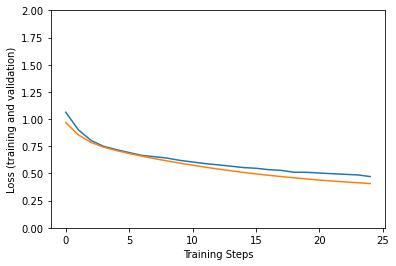

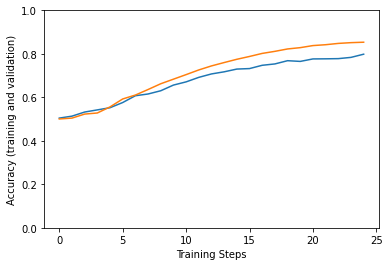

In [12]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(history["loss"])
plt.plot(history["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])

Saving the model for future use

In [13]:
model.save('catsxdogs_mobilenet.h5')
from google.colab import files
files.download('catsxdogs_mobilenet.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Showing the files from the single_prediction folder with unpublished images for the network to sort

In [14]:
ls catsxdogs/single_prediction

cat_or_dog_1.jpg  chino1.jpg  floyd2.jpg  floyd4.jpg
cat_or_dog_2.jpg  floyd1.jpg  floyd3.jpg


Choosing an image from the single_prediction folder to make the prediction

In [15]:
test_image = image.load_img('catsxdogs/single_prediction/chino1.jpg', target_size = (224, 224))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image/255

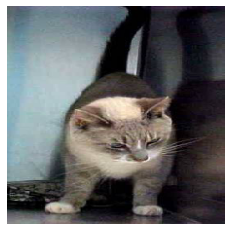

In [16]:
x, y = next(iter(test_set))
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

In [17]:
result = model.predict(test_image)

if result[0][0] > 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print(prediction)

cat
